## Coursework 1 - ID5059

In [7]:
# ## Set theme 
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('grade3')

## Draft 8 - with Scaler()
### Task:

The task is to predict the list price (the attribute list) from a subset of the other attributes.

Some, but not all, of the attributes are described on the Kaggle page.

You will need to:

- explore the structure of the data, and identify a small number of attributes that could plausibly correlate well with the price

- split into training and test sets (for small or medium files; this is already done for you for the large and huge files, to avoid you having to make separate copies)

- perform data cleaning, if necessary (Do this before splitting)

- select and train a few models

- evaluate performance on the test data using an appropriate measure

In [8]:
## Import the necessary libraries:
import pandas
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder ## replace by label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from scipy import stats

### References/ Inspiration:
* References are above the code used
* Note that I have used code from lecture 7-8 as well as the book Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow by O'Reilly


In [9]:
## We will consider the medium sized data
## Reading in the csv file:
#cars_0 = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Coursework-1/used_cars_data_medium_0.csv", dtype={"bed": "string", "dealer_zip": "string"})

## Large data set:
cars_0 = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Coursework-1/used_cars_data_large_0.csv", dtype={"bed": "string", "dealer_zip": "string"})
## Clear the maximum number of columns to be displayed so that all will be visible.
pandas.set_option('display.max_columns', None)

## Data Exploration: 
- look at correlations
- plot heat map
- maybe map of the data
- investigate where height width etc all had the same nbr of NaNs


In [10]:
cars_0

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,<NA>,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,<NA>,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,<NA>,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,<NA>,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,<NA>,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.000000,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [11]:
## Hey my grandma lives here!
cars_01 = cars_0[cars_0['city'] == 'Baldwin Park']
cars_01

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
143943,1C4AJWAG5HL726348,35.6 in,<NA>,NaN,NaN,SUV / Crossover,NaN,Baldwin Park,17.0,NaN,21,91706,"Clean Carfax, One Owner vehicle with only 17k ...",V6,3600.0,V6,Rhino,False,False,False,NaN,41 in,18.6 gal,Gasoline,False,72.5 in,21.0,285.0,Black,False,NaN,NaN,False,NaN,34.0926,164.3 in,2020-08-27,UNKNOWN,280370050,-117.935,https://static.cargurus.com/images/forsale/202...,"['Alloy Wheels', 'Steel Wheels', 'Bluetooth']",Jeep,4 seats,17710.0,Wrangler,1.0,"285 hp @ 6,400 RPM",30500.0,False,1287,5.0,437590.0,EDITION MOTORS LLC,False,"260 lb-ft @ 4,800 RPM",A,5-Speed Automatic,t69689,Willys Wheeler,NaN,4WD,Four-Wheel Drive,95.4 in,73.7 in,2017


C:\Users\Julia\AppData\Local\Temp\ipykernel_18732\3981955191.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cars_0_dropped.corr()


<AxesSubplot: >

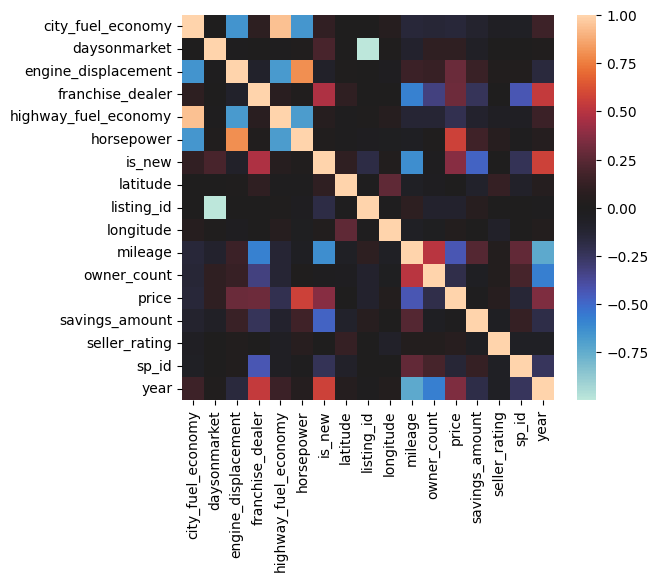

In [12]:
## Ref: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
## Compute the correlation matrix, drop NaNs columns before:
cars_0_dropped = cars_0.drop(['combine_fuel_economy', 'is_certified', 'vehicle_damage_category'], axis=1)
corr_matrix = cars_0_dropped.corr()

## Fix size so we can see ALL attributes
fig, ax = plt.subplots(figsize=(6,5))

## Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='icefire')

#### Suppose we create a new feature: combined_fuel_economy

C:\Users\Julia\AppData\Local\Temp\ipykernel_18732\1486475883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = cars_0_dropped.corr()


<AxesSubplot: >

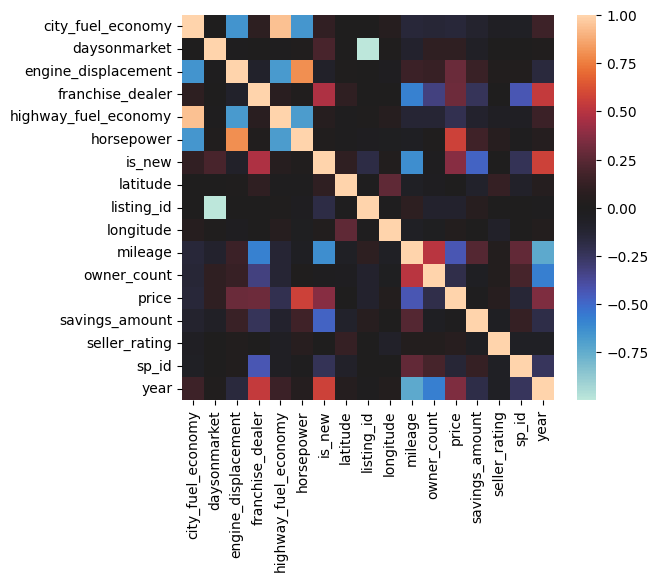

In [13]:
cars_0_dropped['combined_fuel_economy'] = cars_0_dropped['city_fuel_economy'] + cars_0_dropped['highway_fuel_economy']
corr_matrix2 = cars_0_dropped.corr()

## Fix size so we can see ALL attributes
fig, ax = plt.subplots(figsize=(6,5))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='icefire')

Strong positive correlation between city_fuel_economy and  highway_fuel_economy and strong negative correlation between  listing_id and daysonmarket. Horsepower and engine_displacement appear correlated.



In [14]:
## Correlation with price:

corr_matrix["price"].sort_values(ascending=False)
# corr_matrix2['price'].sort_values(ascending=False)

price                   1.000000
horsepower              0.563845
is_new                  0.374353
year                    0.347763
franchise_dealer        0.300468
engine_displacement     0.296877
daysonmarket            0.097639
seller_rating           0.057154
longitude               0.037065
latitude               -0.003461
savings_amount         -0.008271
listing_id             -0.093314
sp_id                  -0.134734
city_fuel_economy      -0.144320
owner_count            -0.198848
highway_fuel_economy   -0.210078
mileage                -0.432690
Name: price, dtype: float64

*Note: Tried to look at correlations of price against encoded categorical variables but do not have enough memory to execute*

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

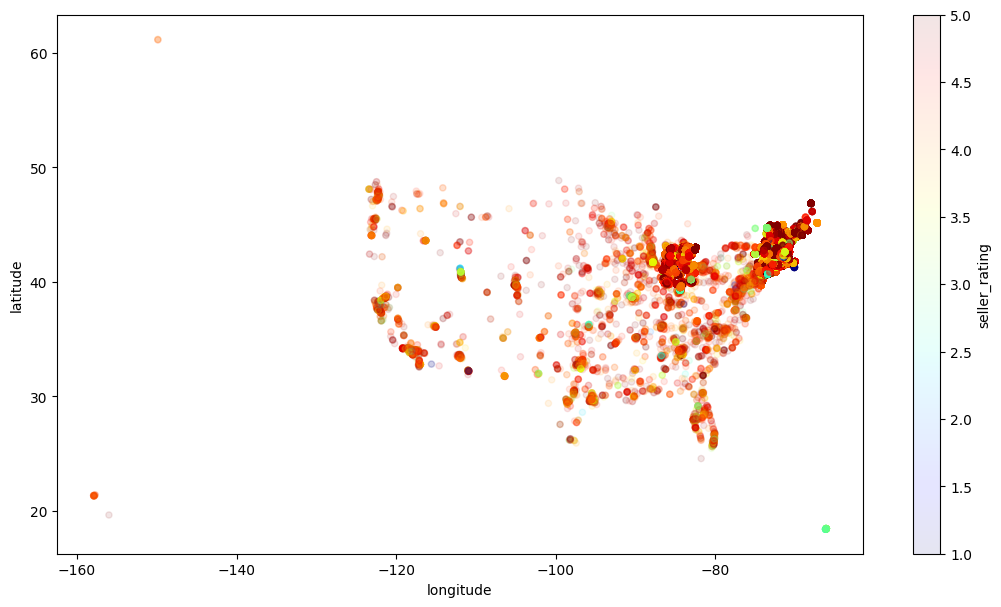

In [15]:
## Firstly look at the scatterplot: (latitude/ longitude):
## Code from Book

cars_0.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, c="seller_rating",  figsize=(13,7),
 cmap=plt.get_cmap("jet"), colorbar=True)        

Overall, it looks like the most common rating is above 4. It appears like we have got three locations of outliers: Alaska, Hawaii and Puerto Rico.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

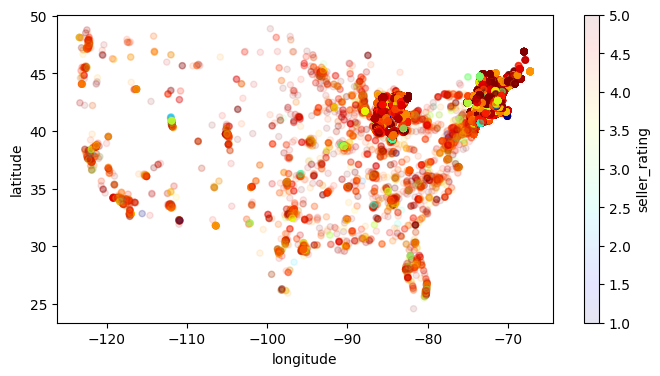

In [16]:
## Filter data and plot:
Mainland_data = cars_0[(cars_0['latitude'] < 52) & (cars_0['longitude'] > -130) & (cars_0['latitude'] > 24)]  

Mainland_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, c="seller_rating",  figsize=(8,4),
 cmap=plt.get_cmap("jet"), colorbar=True)  

 Look at the outliers:

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

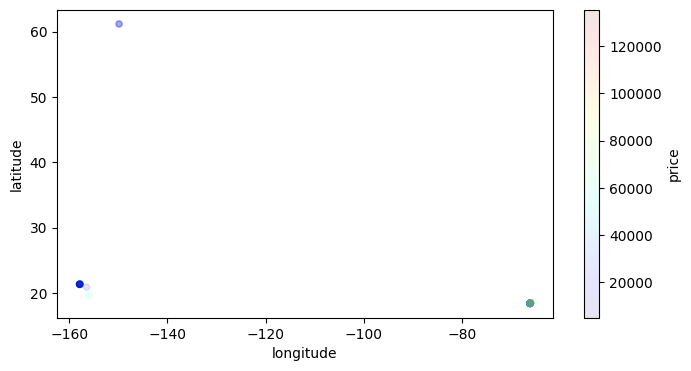

In [17]:
## Filter data and look at the outliers
filtered_data = cars_0[(cars_0['latitude'] < 23) | (cars_0['longitude'] < -140)]

filtered_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, c="price",  figsize=(8,4),
 cmap=plt.get_cmap("jet"), colorbar=True)  


In [18]:
## Look at the outlier points:
filtered_data['city'].value_counts() ## ~ 134 outliers points (ie off mainland USA)

San Juan       69
Bayamon        32
Honolulu       20
Kailua          4
Anchorage       4
Guaynabo        3
Kahului         1
Kailua Kona     1
Name: city, dtype: int64

In [19]:
## How many NaN counts? maybe a pattern?
unique_nan_counts = cars_0.isna().sum().value_counts()
unique_nan_counts[unique_nan_counts >= 5].index.tolist()

[0, 14420, 132302]

### What is the % of missing values in each column?

In [20]:
## percentage of missing values in data set:
pd.set_option('display.max_rows', None)
(cars_0.isna().sum() / len(cars_0) * 100).sort_values(ascending=False)

vehicle_damage_category    100.000000
combine_fuel_economy       100.000000
is_certified               100.000000
bed                         99.373947
cabin                       98.094768
is_oemcpo                   93.818654
is_cpo                      91.382123
bed_height                  88.562176
bed_length                  88.562176
owner_count                 47.616260
fleet                       44.771947
theft_title                 44.771947
isCab                       44.771947
has_accidents               44.771947
frame_damaged               44.771947
salvage                     44.771947
franchise_make              21.104087
highway_fuel_economy        16.498365
city_fuel_economy           16.498365
torque                      15.921720
power                       14.821896
main_picture_url            14.038822
major_options                7.596564
engine_displacement          5.230760
horsepower                   5.230760
back_legroom                 4.879832
wheelbase   

In [21]:
### Don't forget to run me below! :) ###
pd.reset_option('display.max_rows')

## Data Cleaning/Transformation via Functions

In [22]:
## Choose those columns of interest: (some are irrelevant, eg is_oemcpo: Type Boolean. Pre-owned cars certified by the manufacturer)
## as well as the exact geolocation of the dealership.
## Keep transmission - ppl do look for automatic/manual cars specifically
## wheelbase - do ppl really think of how far apart wheels are?
## fleet ~ A car that is bought as one of a number owned and operated by a particular company, e. g. as company cars

## Reduce the data set therefore by keeping:
cars_1 = cars_0[['back_legroom', 'body_type','engine_cylinders', 'fleet','front_legroom',
 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height','horsepower', 'is_new','length',
 'listing_color', 'major_options', 'make_name', 'maximum_seating', 'mileage', 
 'owner_count', 'price', 'torque', 'transmission_display', 'wheel_system_display', 'width', 'year']]


In [23]:
## Split data and choose 80-20 split:
train_set, test_set = train_test_split(cars_1, test_size=0.2, random_state=314)

## Length of data of our training data
len(train_set) ## ~ 236401

236401

In [24]:
## Rename set (want to apply the functions later to the test data without renaming every train_set instance)
cars_set = train_set
cars_set

,back_legroom,body_type,engine_cylinders,fleet,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,is_new,length,listing_color,major_options,make_name,maximum_seating,mileage,owner_count,price,torque,transmission_display,wheel_system_display,width,year
196105,38.5 in,SUV / Crossover,I4,False,41.3 in,15.3 gal,Gasoline,True,66.1 in,180.0,False,179.3 in,BROWN,"['Sunroof/Moonroof', 'Alloy Wheels']",Honda,5 seats,164436.0,2.0,6900.0,"161 lb-ft @ 4,400 RPM",5-Speed Automatic,All-Wheel Drive,71.6 in,2010
164613,36.3 in,SUV / Crossover,V6,False,43.6 in,21.7 gal,Gasoline,True,68 in,260.0,False,189.9 in,WHITE,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Nissan,5 seats,76000.0,2.0,9995.0,"240 lb-ft @ 4,400 RPM",Continuously Variable Transmission,Front-Wheel Drive,74.1 in,2012
256024,38.3 in,SUV / Crossover,I4,False,41.8 in,13.5 gal,Gasoline,False,64.8 in,180.0,False,173 in,BLACK,"['Leather Seats', 'Alloy Wheels', 'Bluetooth',...",Jeep,5 seats,50582.0,1.0,20496.0,"175 lb-ft @ 3,900 RPM",9-Speed Automatic,Four-Wheel Drive,80 in,2017
163824,36.4 in,Sedan,V8,False,43.5 in,18.8 gal,Gasoline,False,56.1 in,342.0,False,190 in,UNKNOWN,"['Leather Seats', 'Sunroof/Moonroof', 'Power P...",Lexus,5 seats,104801.0,2.0,11500.0,"339 lb-ft @ 3,600 RPM",8-Speed Automatic,Rear-Wheel Drive,71.7 in,2008
56399,31 in,Sedan,I4,NaN,44.5 in,10.8 gal,Gasoline,NaN,57.3 in,122.0,True,177 in,SILVER,NaN,Nissan,5 seats,0.0,NaN,19110.0,"114 lb-ft @ 4,000 RPM",Continuously Variable Transmission,Front-Wheel Drive,68.5 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,37.4 in,SUV / Crossover,I4 Hybrid,NaN,41.7 in,11.9 gal,Hybrid,NaN,60.8 in,139.0,True,171.5 in,UNKNOWN,"['Alloy Wheels', 'Backup Camera', 'Android Aut...",Kia,5 seats,2.0,NaN,24345.0,NaN,6-Speed Dual Clutch,Front-Wheel Drive,71.1 in,2020
142166,38.1 in,Sedan,I4 Diesel,True,41.2 in,14.5 gal,Diesel,False,57.2 in,140.0,False,182.2 in,BLUE,"['Alloy Wheels', 'Bluetooth', 'Heated Seats']",Volkswagen,5 seats,46143.0,2.0,12500.0,"236 lb-ft @ 1,750 RPM",Automatic,Front-Wheel Drive,70 in,2014
175817,NaN,Hatchback,I4 Hybrid,True,NaN,NaN,Hybrid,False,NaN,NaN,False,NaN,WHITE,['Bluetooth'],Toyota,NaN,108662.0,1.0,14900.0,NaN,Automatic,NaN,NaN,2017
75373,36.1 in,SUV / Crossover,I4,False,42.8 in,15.9 gal,Gasoline,False,64.8 in,235.0,False,182.3 in,WHITE,"['Leather Seats', 'Sunroof/Moonroof', 'Power P...",Lexus,5 seats,16352.0,1.0,30988.0,"258 lb-ft @ 4,000 RPM",Automatic,All-Wheel Drive,83.9 in,2017


In [25]:
## How many NaNs do we need to sort out?:
cars_set.isna().sum()

back_legroom             11527
body_type                  938
engine_cylinders          7160
fleet                   105990
front_legroom            11527
fuel_tank_volume         11527
fuel_type                 5834
has_accidents           105990
height                   11527
horsepower               12351
is_new                       0
length                   11527
listing_color                0
major_options            17996
make_name                    0
maximum_seating          11527
mileage                   9630
owner_count             112722
price                        0
torque                   37777
transmission_display      3302
wheel_system_display     10594
width                    11527
year                         0
dtype: int64

### Now create functions for ease:

In [26]:
def pipe1(df):
    cols_to_transform = ['front_legroom', 'back_legroom', 'length', 'height', 'width']
    
    for col in cols_to_transform:
        df[col] = df[col].str.replace(' in', '')
        ## This finally soled the errors
        df[col] = df[col].replace('--', np.nan)
        df[col] = df[col].astype(float)
        
        ## Impute missing values with the median of the column
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
        
        ## Scale the column using a standard scaler
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    
    return df

In [27]:
## Apply function:
cars_set = pipe1(cars_set) 

In [28]:
def pipe2(df):  ## Basically the same as above
    cols_to_transform1 = ['fuel_tank_volume']
    cols_to_transform2 = ['maximum_seating']
    cols_to_transform3 = ['torque']

    for col in cols_to_transform1:
        df[col] = df[col].str.replace(' gal', '')
        df[col] = df[col].replace('--', np.nan)
        df[col] = df[col].astype(float)
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    for col in cols_to_transform2:
        df[col] = df[col].str.replace(' seats', '')
        df[col] = df[col].replace('--', np.nan)
        df[col] = df[col].astype(float)
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    for col in cols_to_transform3:  ## keep the first three characters in string
        df[col] = df[col].str[:3]
        df[col] = df[col].replace('--', np.nan)
        df[col] = df[col].astype(float)
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df

In [29]:
## Apply function:
cars_set = pipe2(cars_set)

In [30]:
def pipe3(df):
    cols_to_transform1 = ['horsepower', 'mileage']

    for col in cols_to_transform1:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df

In [31]:
## Apply function:
cars_set = pipe3(cars_set)

In [32]:
def pipe4(df):
    cols_to_transform1 = ['fleet', 'has_accidents', 'owner_count']

    for col in cols_to_transform1:  ## Let 'Unknown' be its own class:
        df[col].fillna('Unknown', inplace=True)
    return df

In [33]:
## Apply function:
cars_set = pipe4(cars_set)

In [34]:
def pipe5(df):
    cols_to_transform1 = ['major_options']
    
    for col in cols_to_transform1: 
        df[col] = df[col].fillna("[]") ## make sure to do this - errors otherwise...
        df[col] = df[col].apply(ast.literal_eval)
        df[col] = df[col].apply(lambda x: len(x) if x else np.nan)  ## replace by the length ie nbr of elements inside
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    return df

In [35]:
## Apply function:
cars_set = pipe5(cars_set)

In [36]:
## drop engine_cylinders, keep fuel_type
cars_set.drop(['engine_cylinders'], axis=1, inplace=True)

In [37]:
def pipe6(df):
    cols_to_transform1 = ['transmission_display']
## Replace any instance of automatic/manual etc. in a string with noise to Automatic/Manual
    for col in cols_to_transform1:
        df[col] = df[col].fillna('Unknown')
        df.loc[df[col].str.contains('automatic', case=False), col] = 'Automatic'
        df.loc[df[col].str.contains('manual', case=False), col] = 'Manual'
        df.loc[~df[col].isin(['Automatic', 'Manual']), col] = 'Other'

    return df

In [38]:
## Apply function:
cars_set =  pipe6(cars_set)

In [39]:
def pipe7(df):
    cols_to_transform1 = ['wheel_system_display']

    for col in cols_to_transform1:
        ## Replace NaNs with 'Unknown'
        df[col] = df[col].fillna('Unknown')
        ## Replace the two types with the lowest counts with 'Other'
        counts = df[col].value_counts()
        wheel_system_display_lowest = counts.nsmallest(2).index.tolist()
        df.loc[df[col].isin(wheel_system_display_lowest), 'wheel_system_display'] = 'Other'
    
    return df


In [40]:
## Apply function:
cars_set =  pipe7(cars_set)

In [41]:
def pipe8(df):
    cols_to_transform1 = ['body_type']

    for col in cols_to_transform1:
        # Replace NaNs with 'Unknown'
        df[col] = df[col].fillna('Unknown')
        # Replace the two types with the lowest counts with 'Other'
        counts = df[col].value_counts()
        wheel_system_display_lowest = counts.nsmallest(2).index.tolist()
        df.loc[df[col].isin(wheel_system_display_lowest), 'body_type'] = 'Other'
    
    return df

In [42]:
## Apply function:
cars_set = pipe8(cars_set)

In [43]:
def pipe9(df):
    cols_to_transform1 = ['fuel_type']

    for col in cols_to_transform1:
        # Replace NaNs with 'Unknown'
        df[col] = df[col].fillna('Unknown')
        # Replace the three types with the lowest counts with 'Other'
        counts = df[col].value_counts()
        wheel_system_display_lowest = counts.nsmallest(3).index.tolist()
        df.loc[df[col].isin(wheel_system_display_lowest), 'fuel_type'] = 'Other'
    
    return df


In [44]:
## Apply function:
cars_set = pipe9(cars_set)

In [45]:
## Check progress:
cars_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236401 entries, 196105 to 14856
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          236401 non-null  float64
 1   body_type             236401 non-null  object 
 2   fleet                 236401 non-null  object 
 3   front_legroom         236401 non-null  float64
 4   fuel_tank_volume      236401 non-null  float64
 5   fuel_type             236401 non-null  object 
 6   has_accidents         236401 non-null  object 
 7   height                236401 non-null  float64
 8   horsepower            236401 non-null  float64
 9   is_new                236401 non-null  bool   
 10  length                236401 non-null  float64
 11  listing_color         236401 non-null  object 
 12  major_options         236401 non-null  float64
 13  make_name             236401 non-null  object 
 14  maximum_seating       236401 non-null  float64
 

In [46]:
## Look at correlation:
corr_matrix = cars_set.corr()
corr_matrix["price"].sort_values(ascending=False)

C:\Users\Julia\AppData\Local\Temp\ipykernel_18732\146024794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cars_set.corr()


price               1.000000
horsepower          0.518987
torque              0.426148
is_new              0.372657
year                0.345748
width               0.330526
fuel_tank_volume    0.299980
length              0.272605
major_options       0.241108
height              0.205733
back_legroom        0.186600
maximum_seating     0.081673
front_legroom       0.017960
mileage            -0.424985
Name: price, dtype: float64

In [47]:
def pipe10(df):
    ## Factor the levels/ encode: ensure all are numeric
    numeric_col = ['major_options', 'front_legroom', 'back_legroom', 'length', 'height', 'width', 'fuel_tank_volume', 'maximum_seating', 'horsepower', 'mileage', 'price']     
    ## convert string to numeric:
    df[numeric_col] = (df[numeric_col]).astype(float)
    
    ## Ordinal encode:
    ordinal = ['year']
    ordinal_encoder = OrdinalEncoder()
    df[ordinal] = ordinal_encoder.fit_transform(df[ordinal])
    
    categorical_cols = ['body_type', 'fuel_type', 'is_new', 'listing_color', 'make_name', 'transmission_display', 'wheel_system_display', 'fleet', 'has_accidents', 'owner_count'] 
    df[categorical_cols] = df[categorical_cols].astype('string') # ensure columns are of string type
    encoded_cols_df = df[categorical_cols].apply(LabelEncoder().fit_transform) # apply label encoding
    df[categorical_cols] = encoded_cols_df # replace original columns with encoded columns
    return df

In [48]:
## Apply function:
cars_set = pipe10(cars_set)

In [49]:
cars_set

,back_legroom,body_type,fleet,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,is_new,length,listing_color,major_options,make_name,maximum_seating,mileage,owner_count,price,torque,transmission_display,wheel_system_display,width,year
196105,0.235964,5,0,-0.550484,-0.618754,2,1,0.047479,-0.762715,0,-0.685310,2,2.0,21,-0.345256,3.106881,5,6900.0,-0.980651,0,0,-0.944513,72.0
164613,-0.530848,5,0,0.996051,0.677793,2,1,0.310905,0.182063,0,-0.101784,13,7.0,45,-0.345256,1.059092,5,9995.0,-0.186862,2,2,-0.598505,74.0
256024,0.166254,5,0,-0.214281,-0.983408,2,0,-0.132760,-0.762715,0,-1.032123,0,8.0,27,-0.345256,0.470523,0,20496.0,-0.839979,0,1,0.218076,79.0
163824,-0.495993,6,0,0.928811,0.090295,2,0,-1.338973,1.150460,0,-0.096279,12,9.0,33,-0.345256,1.725997,5,11500.0,0.807886,0,3,-0.930673,70.0
56399,-2.378168,6,2,1.601217,-1.530389,2,2,-1.172599,-1.447679,1,-0.811925,10,6.0,45,-0.345256,-0.700734,13,19110.0,-1.452905,2,2,-1.373564,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.147442,5,2,-0.281521,-1.307545,3,2,-0.687341,-1.246913,1,-1.114698,12,4.0,30,-0.345256,-0.700688,13,24345.0,-0.005999,2,2,-1.013715,82.0
142166,0.096544,6,1,-0.617725,-0.780822,0,0,-1.186464,-1.235104,0,-0.525666,1,3.0,64,-0.345256,0.367735,5,12500.0,-0.227054,0,2,-1.165959,76.0
175817,0.096544,1,1,-0.214281,-0.193325,3,0,0.047479,-0.042322,0,-0.156834,13,1.0,62,-0.345256,1.815401,0,14900.0,-0.005999,0,4,-0.031050,79.0
75373,-0.600558,5,0,0.458126,-0.497203,2,0,-0.132760,-0.113180,0,-0.520161,13,9.0,33,-0.345256,-0.322093,0,30988.0,-0.005999,0,0,0.757849,79.0


In [50]:
## Look at correlation:
corr_matrix = cars_set.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
horsepower              0.518987
torque                  0.426148
is_new                  0.372657
year                    0.348163
fleet                   0.335574
width                   0.330526
owner_count             0.319013
has_accidents           0.316107
fuel_tank_volume        0.299980
length                  0.272605
major_options           0.241108
height                  0.205733
back_legroom            0.186600
maximum_seating         0.081673
fuel_type               0.074186
front_legroom           0.017960
listing_color           0.013749
make_name              -0.065304
wheel_system_display   -0.083792
transmission_display   -0.117919
body_type              -0.124073
mileage                -0.424985
Name: price, dtype: float64

<AxesSubplot: >

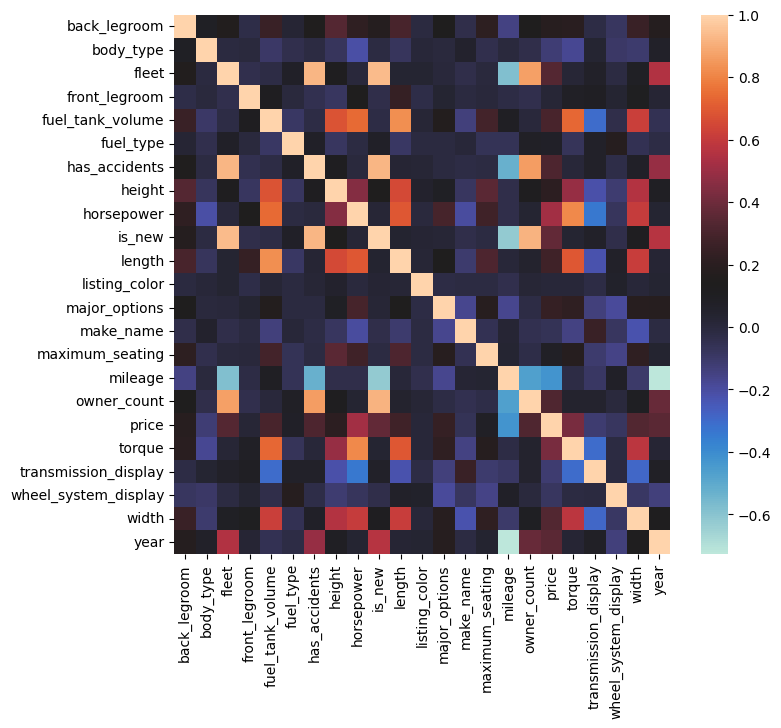

In [51]:
## Ref: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
## Heat matrix:
# Compute the correlation matrix
corr_matrix = cars_set.corr()

## Fix size so we can see ALL attributes
fig, ax = plt.subplots(figsize=(8,7))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='icefire')

Number of dropped columns is 7 ['has_accidents', 'horsepower', 'is_new', 'length', 'owner_count', 'torque', 'year']


<AxesSubplot: >

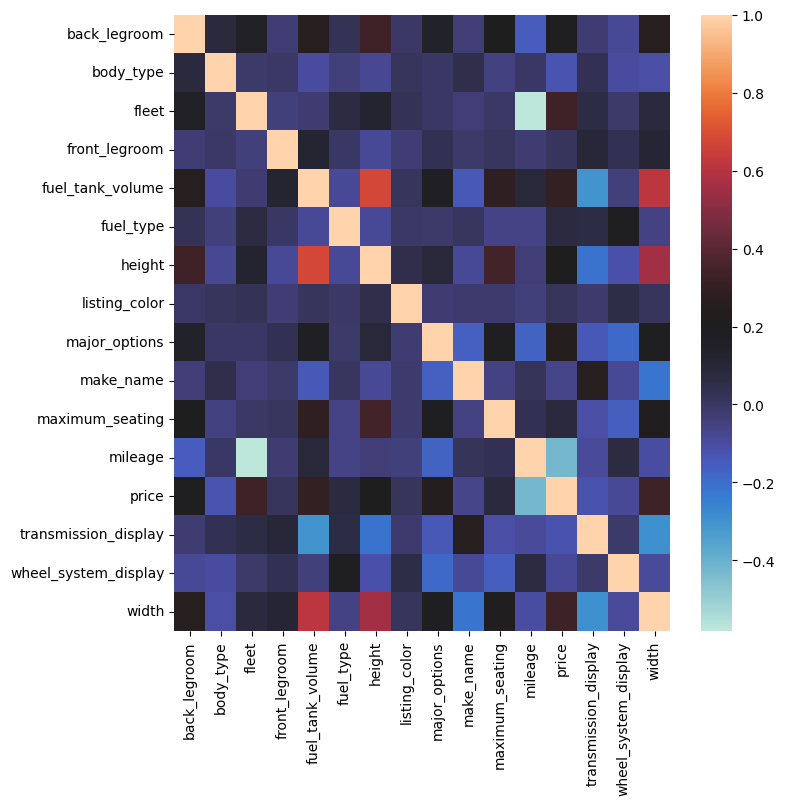

In [52]:
## Ref: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
## modified

## Drop ones with 0.7+ correlation
cor_matrix = cars_set.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
cars_set_mod = cars_set.drop(cars_set.columns[cars_set.columns.get_indexer(to_drop)], axis=1)

## Columns/attributes dropped:
print("Number of dropped columns is", len(to_drop),to_drop)

# Compute the correlation matrix
corr_matrix = cars_set_mod.corr()

## Fix size so we can see ALL attributes
fig, ax = plt.subplots(figsize=(8,8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='icefire')

## Note:

The correlation around height, length, width ~ one would imagine this to be the case with bigger or smaller cars.


# Models: 

In [53]:
## split out training data into predictor variables and the predicted list ~ price
## But only when the training data is of only numeric variables ie numbers and factor levels.

cars = cars_set.drop("price", axis=1)
cars_price = cars_set["price"].copy()

In [54]:
cars

,back_legroom,body_type,fleet,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,is_new,length,listing_color,major_options,make_name,maximum_seating,mileage,owner_count,torque,transmission_display,wheel_system_display,width,year
196105,0.235964,5,0,-0.550484,-0.618754,2,1,0.047479,-0.762715,0,-0.685310,2,2.0,21,-0.345256,3.106881,5,-0.980651,0,0,-0.944513,72.0
164613,-0.530848,5,0,0.996051,0.677793,2,1,0.310905,0.182063,0,-0.101784,13,7.0,45,-0.345256,1.059092,5,-0.186862,2,2,-0.598505,74.0
256024,0.166254,5,0,-0.214281,-0.983408,2,0,-0.132760,-0.762715,0,-1.032123,0,8.0,27,-0.345256,0.470523,0,-0.839979,0,1,0.218076,79.0
163824,-0.495993,6,0,0.928811,0.090295,2,0,-1.338973,1.150460,0,-0.096279,12,9.0,33,-0.345256,1.725997,5,0.807886,0,3,-0.930673,70.0
56399,-2.378168,6,2,1.601217,-1.530389,2,2,-1.172599,-1.447679,1,-0.811925,10,6.0,45,-0.345256,-0.700734,13,-1.452905,2,2,-1.373564,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.147442,5,2,-0.281521,-1.307545,3,2,-0.687341,-1.246913,1,-1.114698,12,4.0,30,-0.345256,-0.700688,13,-0.005999,2,2,-1.013715,82.0
142166,0.096544,6,1,-0.617725,-0.780822,0,0,-1.186464,-1.235104,0,-0.525666,1,3.0,64,-0.345256,0.367735,5,-0.227054,0,2,-1.165959,76.0
175817,0.096544,1,1,-0.214281,-0.193325,3,0,0.047479,-0.042322,0,-0.156834,13,1.0,62,-0.345256,1.815401,0,-0.005999,0,4,-0.031050,79.0
75373,-0.600558,5,0,0.458126,-0.497203,2,0,-0.132760,-0.113180,0,-0.520161,13,9.0,33,-0.345256,-0.322093,0,-0.005999,0,0,0.757849,79.0


In [55]:
cars_price

196105     6900.0
164613     9995.0
256024    20496.0
163824    11500.0
56399     19110.0
           ...   
1066      24345.0
142166    12500.0
175817    14900.0
75373     30988.0
14856      1995.0
Name: price, Length: 236401, dtype: float64

## Linear Regression : testing it on the training set

In [56]:
## Create a linear regression model:
lin_reg = LinearRegression()
lin_reg.fit(cars, cars_price)

LinearRegression()

In [57]:
## Test it out on TRAINING set, look at the overall predictions (from book)
some_data = cars.iloc[:10]
some_labels = cars_price.iloc[:10]

print("Predictions:", lin_reg.predict(some_data).round())
print("Labels:", list(some_labels))
## weird that first prediction is negative...

Predictions: [-2158. 22393. 17105. 31469. 20745. 44066. 33713. 35207.  2163. 28136.]
Labels: [6900.0, 9995.0, 20496.0, 11500.0, 19110.0, 49710.0, 26550.0, 42300.0, 7900.0, 27385.0]


In [58]:
## How about the errors (calc RMSE)
car_price_predictions = lin_reg.predict(cars)
lin_mse = mean_squared_error(cars_price, car_price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
## off by ~ 10511$ without scaler
## off by ~ 15772$ (large data)


15771.549459002415

In [59]:
## Calculate the mean error squared:
mean_absolute_error(y_true=cars_price, y_pred=car_price_predictions)

6725.664411770041

## Cross - Validation - folds = 10

In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, cars, cars_price, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

##  Mean = 15232.14 +/- 4144.75 ~ about the same as the linear regression.

Scores: [11541.01632421 13282.10193519 12276.11306096 12773.88576265
 24221.75392692 13545.39719239 13059.13952364 12234.04788398
 20788.69612885 18599.31471933]
Mean: 15232.146645811968
Standard deviation: 4144.756693313728


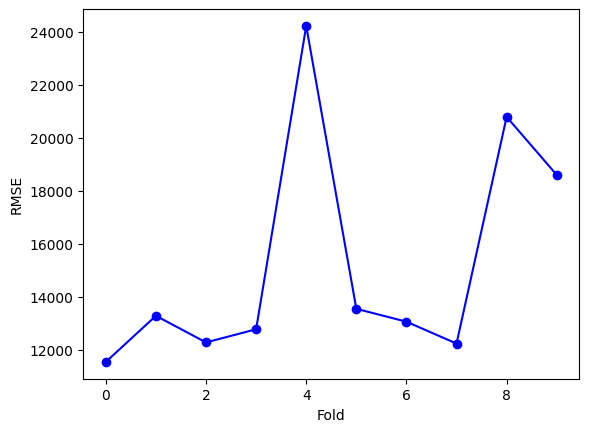

In [61]:
## Create pretty graph
display_scores(lin_rmse_scores)
plt.plot(lin_rmse_scores, 'bo-')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

### Decision tree model


In [62]:
## Fit the model:
## REF: https://www.cambridgespark.com/info/from-simple-regression-to-multiple-regression-with-decision-trees

tree_regressor = DecisionTreeRegressor(random_state=314, max_depth=3)
tree_regressor.fit(cars, cars_price)

DecisionTreeRegressor(max_depth=3, random_state=314)

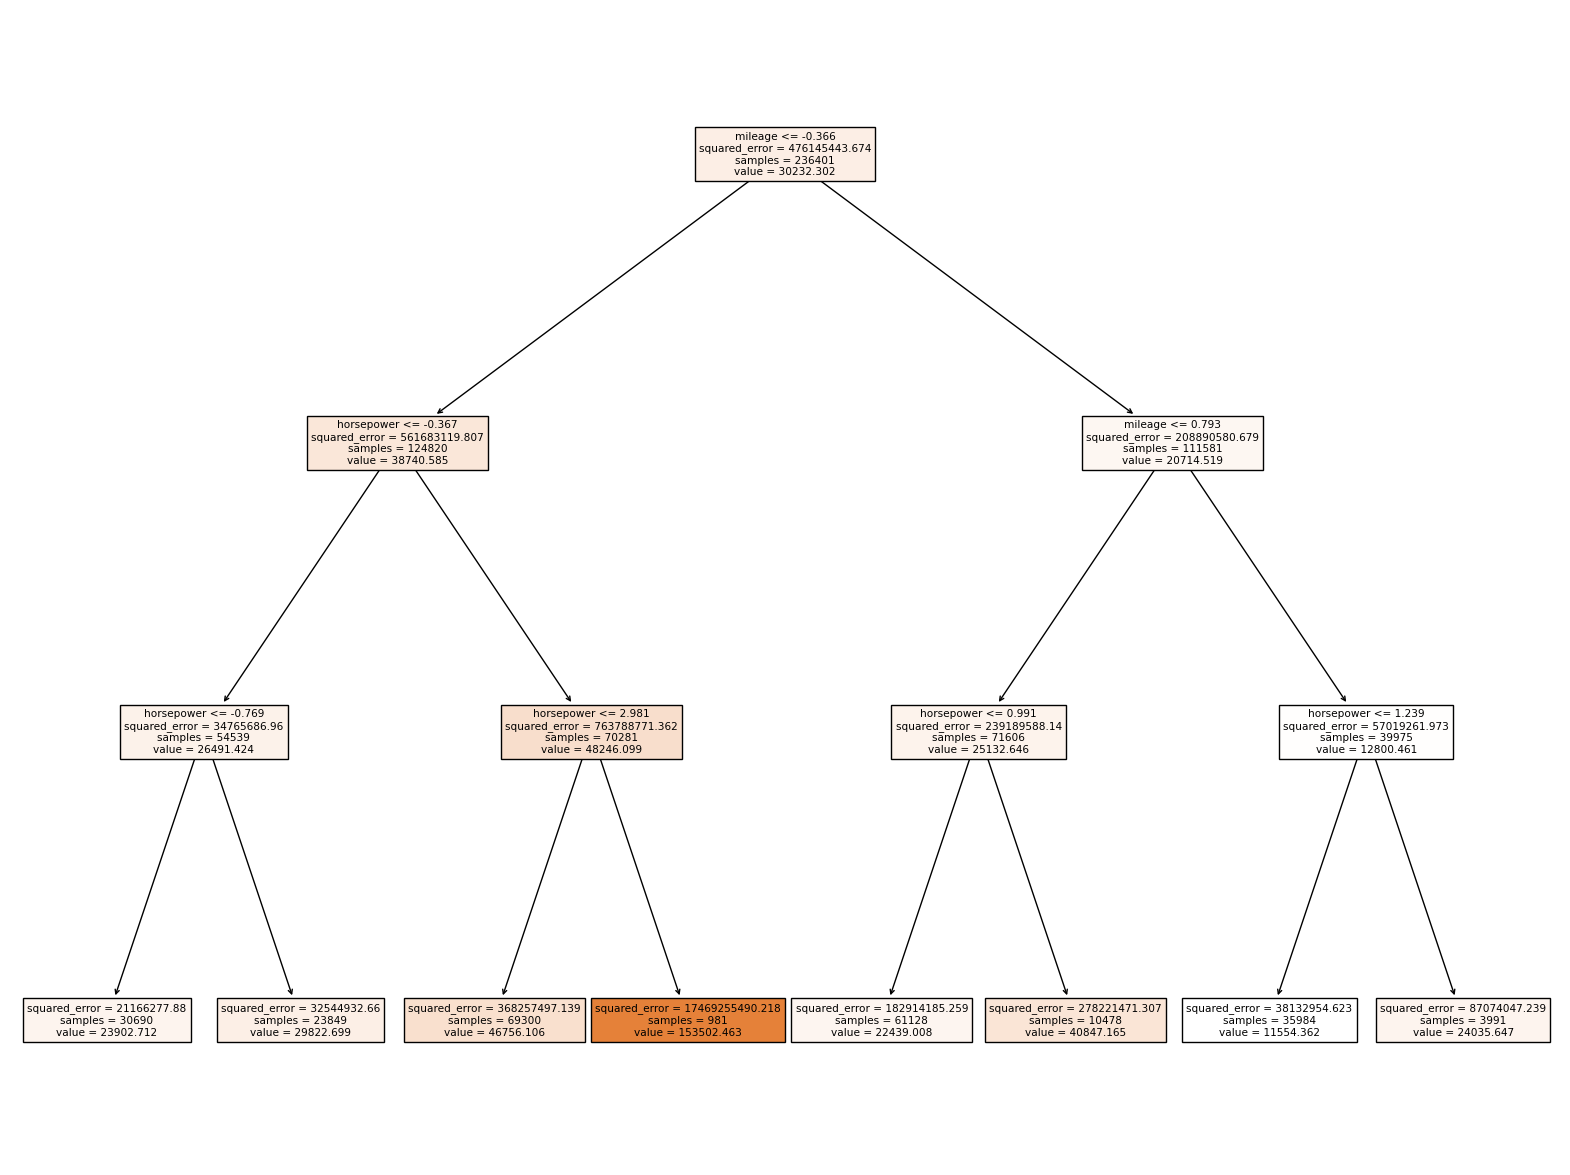

In [63]:
## Produce tree:
## Ref: https://mljar.com/blog/visualize-decision-tree/

fig = plt.figure(figsize=(20,15))
feature_names = cars.columns.tolist()
_ = tree.plot_tree(tree_regressor, feature_names=feature_names, filled=True)

In [64]:
tree_regressor_cars_predictions = tree_regressor.predict(cars)
tree_regressor_mse = mean_squared_error(cars_price, tree_regressor_cars_predictions)
tree_regressor_rmse = numpy.sqrt(tree_regressor_mse)
tree_regressor_rmse

## 15917.93 for large set ~ worse than linear regression.

15917.931394653253

In [65]:
## Calculate the mean squared error:
mean_absolute_error(y_true=cars_price, y_pred=tree_regressor_cars_predictions)

7210.6253544802985

## Cross - Validation - folds = 10

In [66]:
## Perform cross validation
scores = cross_val_score(tree_regressor, cars, cars_price, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scores: [11861.48350282 12882.72895819 12510.03266116 13039.46622522
 24043.90726175 13774.69971983 13602.02908884 12623.55599841
 21058.79044228 18760.47198662]
Mean: 15415.716584513439
Standard deviation: 4054.5538471472223


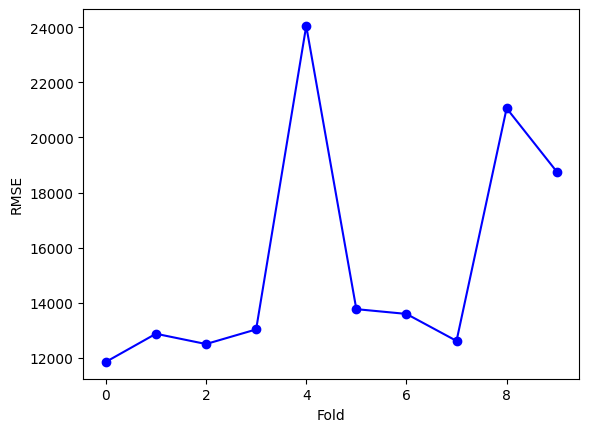

In [67]:
## View outcome:
display_scores(tree_rmse_scores)
plt.plot(tree_rmse_scores, 'bo-')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

## Mean: 15415.72 +/- 4054.55 ~ bit better with folds = 10
## Decision trees prolly not the best...

### Random Forest

In [68]:
forest_regressor = RandomForestRegressor(n_estimators=20, random_state=314)
forest_regressor.fit(cars, cars_price)

forest_regressor_carprice_predictions = forest_regressor.predict(cars)
forest_regressor_mse = mean_squared_error(cars_price, forest_regressor_carprice_predictions)
forest_regressor_rmse = numpy.sqrt(forest_regressor_mse)
forest_regressor_rmse.round()

## = 4429.0 with n_est = 20 and so far the lowest!

4429.0

In [69]:
## Mean absolute error:
mean_absolute_error(y_true=cars_price, y_pred=forest_regressor_carprice_predictions)

1047.3169691536827

## Cross - Validation - folds = 10

Code below takes ~ 953 seconds ~ 15.8 minutes (very long...)

In [70]:
## Time me:
import time
start_time = time.time()

forest_regressor_scores = cross_val_score(forest_regressor, cars, cars_price,
                                          scoring="neg_mean_squared_error", cv=10)
forest_regressor_rmse_scores = numpy.sqrt(-forest_regressor_scores)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.4f} seconds") ## to 4 dp

Elapsed time: 15866.0658 seconds


Scores: [ 5700.39659556  5432.85615296  5722.90208894  9340.66743437
 19284.08199929  7197.00536667  7856.45385436 10559.58013042
 18295.20366129 16917.74022101]
Mean: 10630.688750487083
Standard deviation: 5193.461334799862


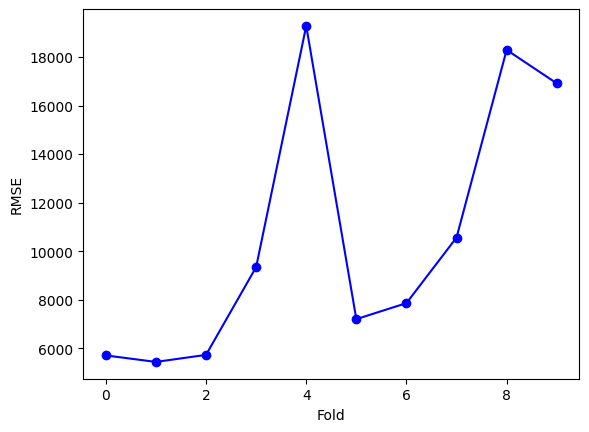

In [71]:
display_scores(forest_regressor_rmse_scores)

plt.plot(forest_regressor_rmse_scores, 'bo-')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

## Mean: 10630.688 +/- 5193.293

Looks like this model is the best, as it has the lowest RMSE score out of linear regression, decision trees and random forests.

# Run now on the test set:

Below we just apply the pipelines to the test data:

In [72]:
## Run pipeline on test set - create function for ease:

def process_cars_set(cars_set):

    cars_set = cars_set[['back_legroom', 'body_type','engine_cylinders', 'fleet','front_legroom',
 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'horsepower', 'is_new','length',
 'listing_color', 'major_options', 'make_name', 'maximum_seating', 'mileage', 
 'owner_count', 'price', 'torque','transmission_display', 'wheel_system_display', 'width', 'year']]
    cars_set.drop(['engine_cylinders'], axis=1, inplace=True) 
    
    cars_set_ = pipe1(cars_set)
    cars_set_ = pipe2(cars_set)
    cars_set_ = pipe3(cars_set)
    cars_set_ = pipe4(cars_set)
    cars_set_ = pipe5(cars_set)
    cars_set_ = pipe6(cars_set)
    cars_set_ = pipe7(cars_set)
    cars_set_ = pipe8(cars_set)
    cars_set_ = pipe9(cars_set)
    cars_set_ = pipe10(cars_set)

    return cars_set

In [73]:
## Define it to be the test set:
cars_set = test_set
cars_set = process_cars_set(cars_set)

In [74]:
cars_set

,back_legroom,body_type,fleet,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,is_new,length,listing_color,major_options,make_name,maximum_seating,mileage,owner_count,price,torque,transmission_display,wheel_system_display,width,year
85933,-0.744016,6,2,0.056016,-0.887124,2,2,-1.282591,-1.156789,1,-0.541088,13,3.0,21,-0.348512,-0.717749,11,18941.0,-1.284148,2,2,-1.047209,64.0
118936,-2.767222,0,0,1.214737,0.130604,2,0,-1.753545,2.489365,0,-0.188250,0,4.0,9,-1.245260,-0.252914,0,34990.0,1.994457,1,3,-0.518449,61.0
232737,0.093173,4,2,1.623697,1.962514,1,2,1.363065,0.476877,1,2.088660,10,4.0,16,-2.142008,-0.717749,11,32420.0,1.263622,0,1,0.386009,64.0
75578,-0.081241,5,2,-0.421104,0.049186,2,2,0.587375,0.370334,1,0.363060,10,8.0,56,1.444984,-0.717986,11,39101.0,-0.005188,0,0,-0.017518,65.0
214259,0.616416,5,2,-0.761905,-0.622515,2,2,0.047163,0.062542,1,-0.695455,1,8.0,37,-0.348512,-0.717915,11,36925.0,0.624142,0,0,0.678219,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184843,1.418722,5,2,-1.239025,1.107622,2,2,0.836704,1.388416,1,0.732438,0,8.0,39,1.444984,-0.717962,11,88920.0,1.121515,0,0,0.900855,64.0
114810,-0.709133,5,2,-0.898225,-0.887124,2,2,-0.063650,-1.263332,1,-1.285357,10,11.0,7,-0.348512,-0.717915,11,25012.0,-1.121741,0,0,-1.158527,64.0
188880,0.407119,2,0,-0.693744,0.130604,2,0,0.573524,0.500554,0,0.655254,12,5.0,10,2.341732,0.259012,0,21795.0,0.035414,0,2,1.666165,61.0
221854,-0.185890,5,0,-0.898225,-0.195069,2,0,-0.229869,1.388416,0,-0.452879,13,26.0,39,-0.348512,-0.253150,0,47900.0,1.273773,0,0,0.566901,61.0


In [75]:
## split  data into predictor variables and the predicted list ~ price
cars_price = cars_set["price"].copy()  # has price
cars = cars_set.drop("price", axis=1)  # no price

In [76]:
## Check:
cars

,back_legroom,body_type,fleet,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,is_new,length,listing_color,major_options,make_name,maximum_seating,mileage,owner_count,torque,transmission_display,wheel_system_display,width,year
85933,-0.744016,6,2,0.056016,-0.887124,2,2,-1.282591,-1.156789,1,-0.541088,13,3.0,21,-0.348512,-0.717749,11,-1.284148,2,2,-1.047209,64.0
118936,-2.767222,0,0,1.214737,0.130604,2,0,-1.753545,2.489365,0,-0.188250,0,4.0,9,-1.245260,-0.252914,0,1.994457,1,3,-0.518449,61.0
232737,0.093173,4,2,1.623697,1.962514,1,2,1.363065,0.476877,1,2.088660,10,4.0,16,-2.142008,-0.717749,11,1.263622,0,1,0.386009,64.0
75578,-0.081241,5,2,-0.421104,0.049186,2,2,0.587375,0.370334,1,0.363060,10,8.0,56,1.444984,-0.717986,11,-0.005188,0,0,-0.017518,65.0
214259,0.616416,5,2,-0.761905,-0.622515,2,2,0.047163,0.062542,1,-0.695455,1,8.0,37,-0.348512,-0.717915,11,0.624142,0,0,0.678219,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184843,1.418722,5,2,-1.239025,1.107622,2,2,0.836704,1.388416,1,0.732438,0,8.0,39,1.444984,-0.717962,11,1.121515,0,0,0.900855,64.0
114810,-0.709133,5,2,-0.898225,-0.887124,2,2,-0.063650,-1.263332,1,-1.285357,10,11.0,7,-0.348512,-0.717915,11,-1.121741,0,0,-1.158527,64.0
188880,0.407119,2,0,-0.693744,0.130604,2,0,0.573524,0.500554,0,0.655254,12,5.0,10,2.341732,0.259012,0,0.035414,0,2,1.666165,61.0
221854,-0.185890,5,0,-0.898225,-0.195069,2,0,-0.229869,1.388416,0,-0.452879,13,26.0,39,-0.348512,-0.253150,0,1.273773,0,0,0.566901,61.0


In [77]:
## Predict now using random forest model:
Predict_price_on_test = forest_regressor.predict(cars)

In [78]:
## Print the predicted car prices, then compare later to the actual car prices in the test set
Predict_price_on_test

array([22275.55833333, 42980.95      , 69694.7       , ...,
       16540.45      , 23429.3       , 13505.95      ])

In [79]:
## vs the actual prices:
cars_price

## convert to array:
cars_price_array = cars_price.values
cars_price_array

array([18941., 34990., 32420., ..., 21795., 47900., 25997.])

In [80]:
# forest_regressor_carprice_predictions = forest_regressor.predict(cars)
forest_regressor_mse = mean_squared_error(cars_price, Predict_price_on_test)
forest_regressor_rmse = numpy.sqrt(forest_regressor_mse)
forest_regressor_rmse.round()

## RMSE ~ 13755.0

32246.0

In [81]:
## Confidence interval for generalization error ~ how precise  estimate is
confidence = 0.95
squared_errors = (Predict_price_on_test - cars_price_array) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                   loc=squared_errors.mean(),
                   scale=stats.sem(squared_errors)))

## w/out torque: array([ 9980.12159999, 16237.84888259])
## w/ torque: array([ 9736.77711974, 16840.12483844])

array([30538.38378168, 33868.21461934])